In [6]:
from sympy import Symbol, solveset, Interval
import numpy as np

In [31]:
def cal_ret(k, s, c, t):
    '''
    * k: 목표 자산, s: 시드 머니, c: 현금 흐름, t: 투자 기간
    * r: 목표수익률
    '''
    r=Symbol('r')
    equation = s*((1+r)**(t)) + c*((1-((1+r)**(t)))/(1-(1+r))) - k
    val = solveset(equation, r, Interval(0, 999))
    solve_r = float(list(val)[0])
    return(np.round(solve_r, 6))*100

In [32]:
## 목표 자산
k = 30000 *1e4
## term
d = 5*365
t = int(d/365) ## 연으로 변환
## 시드 머니
s = 10000 *1e4
## cash flow
c = 150*1e4*12

In [33]:
demanded_return = cal_ret(k, s, c, t)

In [34]:
demanded_return

12.915

## Func

In [3]:
def cal_kap(s, c, r, t):
    '''
    * s: seed, c: cashflow, r: return(Y), t: terms(Y)
    * k: 달성자산
    '''
    k = s*((1+r)**t) + c*((1-((1+r)**t)))/(1-(1+r))
    return(k)

In [ ]:
def cal_ret(k, s, c, t):
    '''
    * k: 목표 자산, s: 시드 머니, c: 현금 흐름, t: 투자 기간
    * r: 목표수익률
    '''
    r=Symbol('r')
    equation = s*((1+r)**(t)) + c*((1-((1+r)**(t)))/(1-(1+r))) - k
    val = solveset(equation, r, Interval(0, 999))
    solve_r = float(list(val)[0])
    return(np.round(solve_r, 2))

In [5]:
def cal_term(k, s, c, r):
    '''
    * k: kapital, s: seed, c: cashflow, r: return(Y)
    * t: 요구 기간
    '''
    t=Symbol('t')
    equation = s*((1+r)**(t)) + c*((1-((1+r)**(t)))/(1-(1+r))) - k
    val = solveset(equation, t, Interval(0, 999))
    solve_t = float(list(val)[0])
    return(np.round(solve_t, 2))

## Proc

In [6]:
## seed
s = 10000 * 1e4
## Kapital
k = 30000 *1e4
## term
d = (dt.datetime(2024, 12, 31) - dt.datetime(2020, 1, 1)).days
t = int(d/365) ## 연으로 변환
## cash flow
c = 150*1e4*12

In [7]:
demanded_return = cal_ret(k, s, c, t)

In [8]:
demanded_return

0.13

In [9]:
2.50**(1/5)

1.2011244339814313

In [11]:
def investment_growth(initial_investment, monthly_contribution, annual_return, years):
    """
    Calculate the asset growth over time with given parameters.

    Parameters:
    initial_investment (float): Initial amount of investment.
    monthly_contribution (float): Monthly contribution amount.
    annual_return (float): Annual return rate (as a decimal).
    years (int): Number of years to invest.

    Returns:
    pd.DataFrame: DataFrame containing the asset value at each month, principal invested, and earnings.
    """
    monthly_return = (1 + annual_return) ** (1/12) - 1
    months = years * 12
    asset_values = []
    principal_invested = []
    earnings = []
    current_value = initial_investment
    total_principal = initial_investment

    for month in range(1, months + 1):
        current_value = current_value * (1 + monthly_return) + monthly_contribution
        total_principal += monthly_contribution
        asset_values.append(current_value)
        principal_invested.append(total_principal)
        earnings.append(current_value - total_principal)

    df = pd.DataFrame({
        'Month': range(1, months + 1),
        'Asset Value': asset_values,
        'Principal Invested': principal_invested,
        'Earnings': earnings
    })

    return df

In [45]:
# Example usage
initial_investment = 10000
monthly_contribution = 150
annual_return = 0.13
years = 5  # 20년

df_asset_growth = investment_growth(initial_investment, monthly_contribution, annual_return, years)

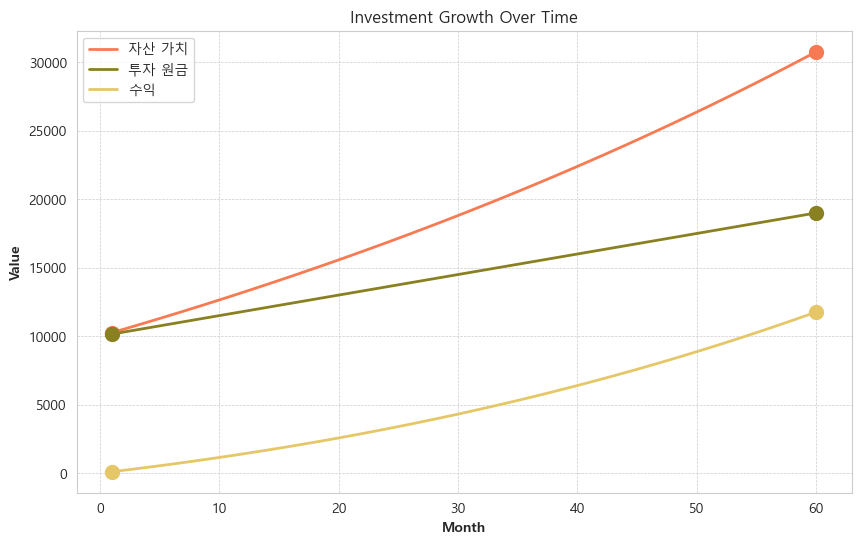

In [46]:
df_asset_growth.rename(columns={'Asset Value': '자산 가치', 'Principal Invested': '투자 원금', 'Earnings': '수익'}).set_index('Month')[['자산 가치', '투자 원금', '수익']].plot()
plt.gca().lines[0].set_color('#F87A53')
plt.gca().lines[0].set_linewidth(2)
plt.gca().lines[1].set_color('#898121')
plt.gca().lines[1].set_linewidth(2)
plt.gca().lines[2].set_color('#E6C767')
plt.gca().lines[2].set_linewidth(2)
plt.legend(['자산 가치', '투자 원금', '수익'], loc='upper left', frameon=True)
legend = plt.gca().get_legend()
legend.legendHandles[0].set_color('#F87A53')
legend.legendHandles[1].set_color('#898121')
legend.legendHandles[2].set_color('#E6C767')
plt.xlabel('Month', fontweight='bold')
plt.ylabel('Value', fontweight='bold')
plt.title('Investment Growth Over Time', fontsize=16, fontweight='bold')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # 그리드 추가 및 스타일 설정
plt.title('Investment Growth Over Time')
# 각 그래프의 시작점과 끝점에 포인트를 둥글게 찍기
plt.scatter([1, len(df_asset_growth)], [df_asset_growth['Asset Value'].iloc[0], df_asset_growth['Asset Value'].iloc[-1]], color='#F87A53', s=100, zorder=5)
plt.scatter([1, len(df_asset_growth)], [df_asset_growth['Principal Invested'].iloc[0], df_asset_growth['Principal Invested'].iloc[-1]], color='#898121', s=100, zorder=5)
plt.scatter([1, len(df_asset_growth)], [df_asset_growth['Earnings'].iloc[0], df_asset_growth['Earnings'].iloc[-1]], color='#E6C767', s=100, zorder=5)

plt.show()

In [24]:
5.185718e+08

518571800.0

In [6]:
## seed
s = 34000 * 1e4
## Kapital
k = 150000 *1e4
## term
d = (dt.datetime(2028, 5, 31) - dt.datetime.now()).days
t = int(d/365) ## 연으로 변환
## return
r = 0.43
## cash flow
c = 120*1e4*12

In [20]:
demanded_term = cal_term(k, s, c, r)
demanded_return = cal_ret(k, s, c, t)
expected_kapital = cal_kap(s, c, r, t)

In [42]:
print(f"기간의 충분성: {demanded_term <= t}, 요구기간: {demanded_term}Y, 가용기간: {t}Y")
print(f"수익률의 충분성: {demanded_return <= r}, 요구수익률: {demanded_return*1e2}%, 가용수익률: {r*1e2}%")
print(f"자산의 적절성: {expected_kapital >= k}, 기대자산: {expected_kapital/1e4:.0f}, 목표자산: {k/1e4:.0f}")

기간의 충분성: True, 요구기간: 4.27Y, 가용기간: 5Y
수익률의 충분성: True, 요구수익률: 35.0%, 가용수익률: 43.0%
자산의 적절성: True, 기대자산: 196068, 목표자산: 150000


In [44]:
temp_ls = []
for n in range(1, 2000):
    r = n*0.001
    gap = np.e**r - (1+r)
    temp_ls.append((r, gap))

In [46]:
temp_df = pd.DataFrame(temp_ls, columns=['r', 'gap'])

In [53]:
np.e

2.718281828459045

<AxesSubplot:xlabel='r', ylabel='gap'>

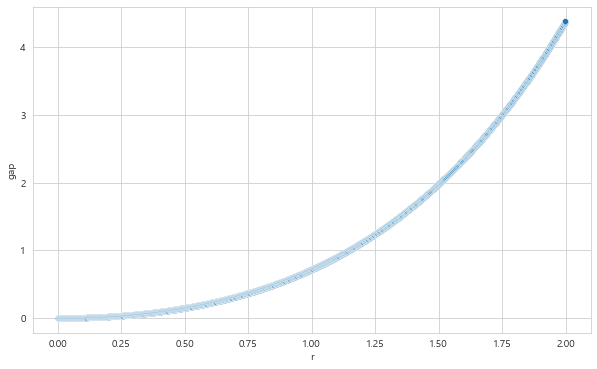

In [141]:
sns.scatterplot(data = temp_df, x = 'r', y = 'gap')